In [32]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import exp

# Data Analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score


# Custom Stuff
# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common import data_parser, misc
from common.model_trainer import ModelTrainer
import companies_data_preprocessor

# Data Preparation

In [33]:
df = data_parser.parse_companies(5)
raw_data, labels = companies_data_preprocessor.preprocess(df, MinMaxScaling=True, imputation=0)




# Model Training

In [20]:
def plot_params(data, labels, fileName, title):
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1 )

    w,l = 15, 5
    plt.figure(figsize=(w,l))

    i = 0
    for hidden_layer in [(100, 1), (100, 2), (100, 3)]:
        i += 1
        plt.subplot(1,3, i)
        params = {
            "hidden_layer_sizes" : [hidden_layer], 
            "alpha" : [10**(-0.1*n) for n in range(20)],
            #solver" : ["lbfgs", "sgd", "adam"]
            }

        modeltrainer = ModelTrainer(MLPClassifier, params, x_train, y_train, x_test, y_test, companies_data_preprocessor.calculate_score, thread_cnt=8)
        modeltrainer.train()
        plt.plot(modeltrainer.result["alpha"], modeltrainer.result["score"], marker='x', label="hidden layer= "+str(hidden_layer))
        plt.xscale("log")
        plt.xlabel("alpha")
        plt.ylabel("score")
        plt.title("hidden layer size: "+str(hidden_layer))


    plt.savefig("out/"+fileName)
    plt.show()

In [21]:
def plot_lossCurve(data, labels, fileName, title):
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1 )

    w,l = 15, 6
    plt.figure(figsize=(w,l))
    i = 0
    for hidden_layer in [(100, 1), (100, 2), (100, 3)]:
        i += 1
        plt.subplot(1,3,i)
        for alpha in [0.01, 0.001, 0.0001]:
            mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, alpha=alpha)
            mlp.fit(x_train, y_train)
            mlp.predict(x_test)
            plt.plot(mlp.loss_curve_, label="alpha="+str(alpha))
        plt.legend()
        plt.yscale("log")
        plt.xscale("log")
        plt.ylabel("loss")
        plt.title(str(hidden_layer))
    plt.savefig("out/"+fileName)
    plt.show()

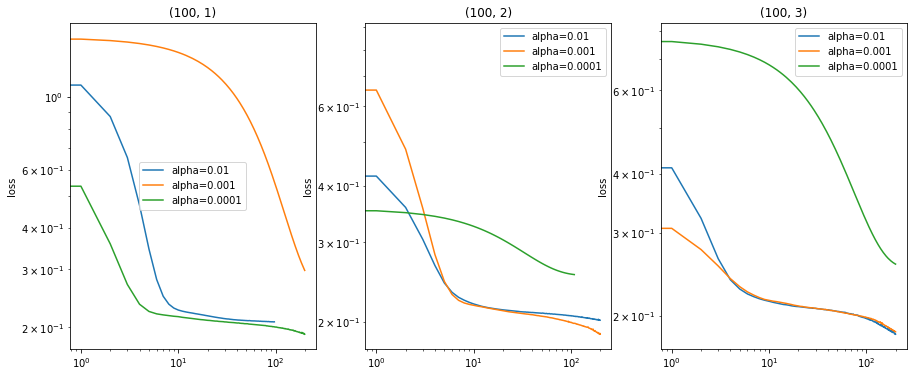

Finished evaluation
Best parameteters found with: {'hidden_layer_sizes': (100, 1), 'alpha': 1.0}
score= 0.9267554479418886
Total evaluation time = 49.66s
Finished evaluation
Best parameteters found with: {'hidden_layer_sizes': (100, 2), 'alpha': 1.0}
score= 0.9267554479418886
Total evaluation time = 45.95s
Finished evaluation
Best parameteters found with: {'hidden_layer_sizes': (100, 3), 'alpha': 1.0}
score= 0.9267554479418886
Total evaluation time = 49.49s


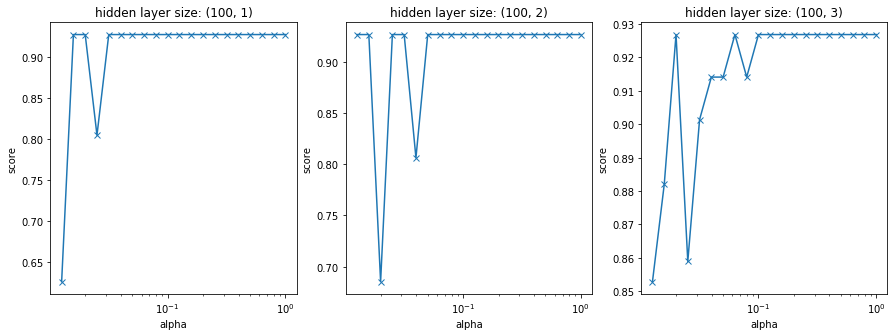

In [22]:
# SMean
preprocessed_data = pd.DataFrame(SimpleImputer(missing_values=np.NaN, strategy="mean").fit_transform(raw_data))

# Normalization with l1 norm
preprocessed_data = pd.DataFrame(Normalizer(norm="l1").fit_transform(preprocessed_data))


plot_lossCurve(preprocessed_data, labels, "companies_mlp_lossCurve", "")
plot_params(preprocessed_data, labels, fileName="companies_mlp_meanImputation", title="Imputation with 0, normalization with l1")

In [52]:
# l1 norm
preprocessed_data = pd.DataFrame(SimpleImputer(missing_values=np.NaN, strategy="mean").fit_transform(raw_data))
preprocessed_data = pd.DataFrame(Normalizer(norm="l1").fit_transform(preprocessed_data))


x_train, x_test, y_train, y_test = train_test_split(preprocessed_data, labels, test_size=0.3, random_state=1)

model = MLPClassifier(hidden_layer_sizes=(100,3), alpha=10**(-0.1*7), random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
print("Accuracy=", accuracy_score(y_test, y_pred))
print("Score=", companies_data_preprocessor.calculate_score(y_test, y_pred))
print("F1=", f1_score(y_test, y_pred))
print("precisions=", precision_score(y_test, y_pred))
print("Recall=", recall_score(y_test, y_pred))
print(mat)

Accuracy= 0.9317540891144952
Score= 0.9267554479418886
F1= 0.0
precisions= 0.0
Recall= 0.0
[[1652    0]
 [ 121    0]]
